In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
plt.rc('axes', grid=True)


In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rc('axes', grid=True)

customers_df = pd.read_csv('customers.csv')
customers_df.head()

orders_df = pd.read_csv('orders.csv')
orders_df.head()

product_df = pd.read_csv('products.csv')
product_df.head()

sales_df = pd.read_csv('sales.csv')
sales_df.head()

customers_df.info()
customers_df.isnull().sum()

print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

customers_df.describe()

orders_df.info()
print('Number of duplicates in order data: ', orders_df.duplicated().sum())

orders_df.describe()

product_df.info()

print('Number of duplicates in product data: ', product_df.duplicated().sum())

product_df.describe()

sales_df.info()

sales_df.isnull().sum()

print('Number of duplicates in sale data: ', sales_df.duplicated().sum())

sales_df.describe()

customers_df.drop_duplicates(inplace=True)

print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

customers_df[customers_df.gender.isnull()]

customers_df.gender.value_counts()

customers_df.gender.fillna(value='Prefer not to say', inplace=True)

customers_df.isnull().sum()

customers_df.gender.value_counts()

customers_df[customers_df.age == customers_df.age.max()]

customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

customers_df[customers_df.age == customers_df.age.max()]

customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

customers_df[customers_df.age == customers_df.age.max()]

customers_df.describe()

datetime_columns = ['order_date', 'delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

product_df.drop_duplicates(inplace=True)

print('Number of duplicates in product data: ', product_df.duplicated().sum())

sales_df[sales_df.total_price.isnull()]

sales_df.head(3)

sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

sales_df.isnull().sum()

sales_df[sales_df['sales_id'] == 121]

customers_df.describe(include='all')

customers_df.groupby(by='gender').agg({
    'customer_id': 'nunique',
    'age': ['max', 'min', 'mean', 'std']
})

customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

orders_df.head(2)
delivery_time = orders_df['delivery_date'] - orders_df['order_date']
delivery_time

delivery_time = delivery_time.apply(lambda x: x.total_seconds())
delivery_time

orders_df['delivery_time'] = round(delivery_time/86_400)

orders_df.head(2)

orders_df.describe(include='all')

customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active'
)
customers_df.sample(5)

customers_df.groupby(by='status').customer_id.count()

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

orders_customers_df.groupby(by='city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

orders_customers_df[orders_customers_df['city'] == 'Jordanside']


orders_customers_df.groupby(by='state').order_id.nunique().sort_values(ascending=False).reset_index()


orders_customers_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False).reset_index()


orders_customers_df['age_group'] = orders_customers_df.age.apply(
    lambda x: 'Youth' if x <= 24 else (
        'Seniors' if x > 64 else 'Adults'
    )
)

orders_customers_df.groupby(by='age_group').order_id.nunique().sort_values(ascending=False).reset_index()

product_df.describe(include='all')

sales_df.describe(include='all')

product_df.sort_values(by='price', ascending=False)

product_df.groupby(by='product_type').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

product_df.groupby(by='product_name').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
sales_product_df.head()

sales_product_df.groupby(by='product_type').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
})

sales_product_df.groupby(by='product_name').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)


all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

all_df.info()

all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})


all_df.groupby(by=['gender', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB
Number of duplicates in customer data:  6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   ord

<ipython-input-8-abc14dfdef33>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.gender.fillna(value='Prefer not to say', inplace=True)
<ipython-input-8-abc14dfdef33>:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB
Number of duplicates in product data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sales_id        5000 non-null   int64         
 1   order_id        5000 non-null   int64         
 2   product_id      5000 non-null   int64         
 3   price_per_unit  5000 non-null   int64         
 4   quantity_x     

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

In [9]:
print(sales_product_df.columns)


Index(['sales_id', 'order_id', 'product_id', 'price_per_unit', 'quantity_x',
       'total_price', 'product_type', 'product_name', 'size', 'colour',
       'price', 'quantity_y', 'description'],
      dtype='object')


<ipython-input-10-1f21f8737f2f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='status', palette='viridis')


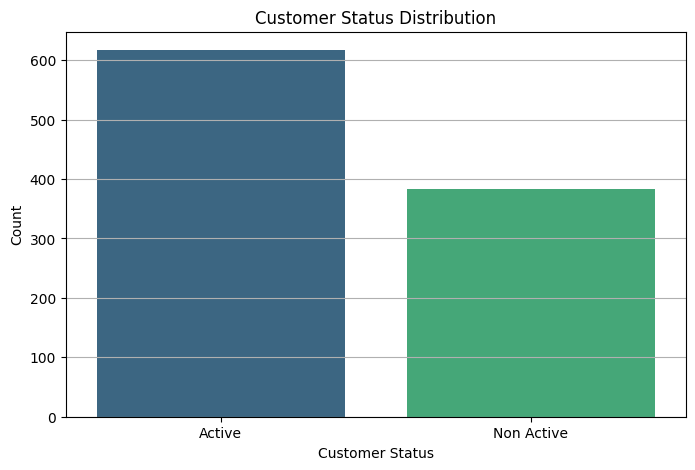

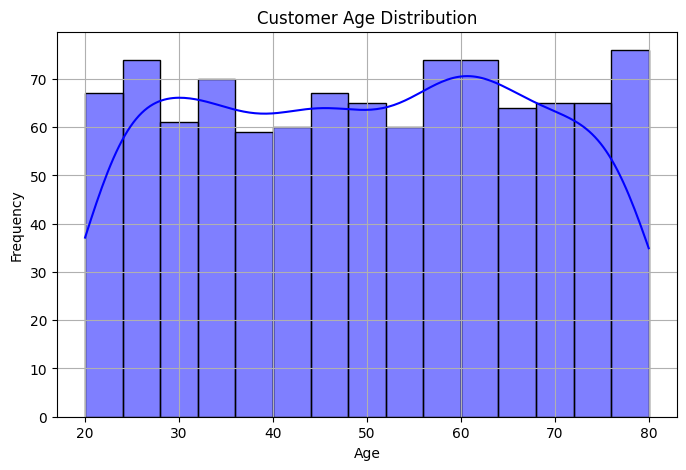

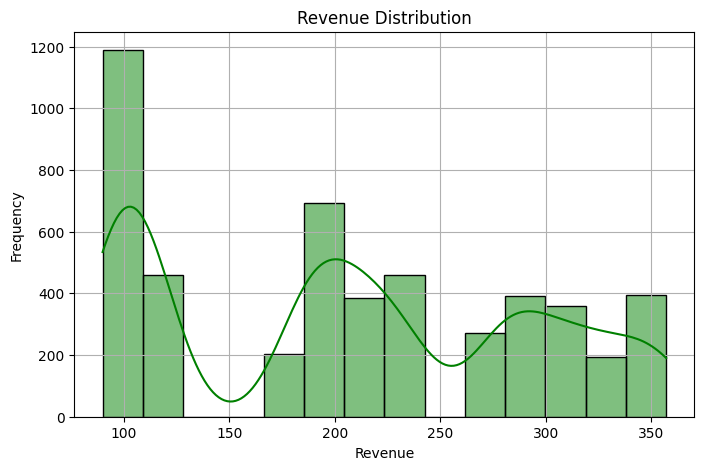

<ipython-input-10-1f21f8737f2f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_revenue, x='state', y='total_price', palette='magma')


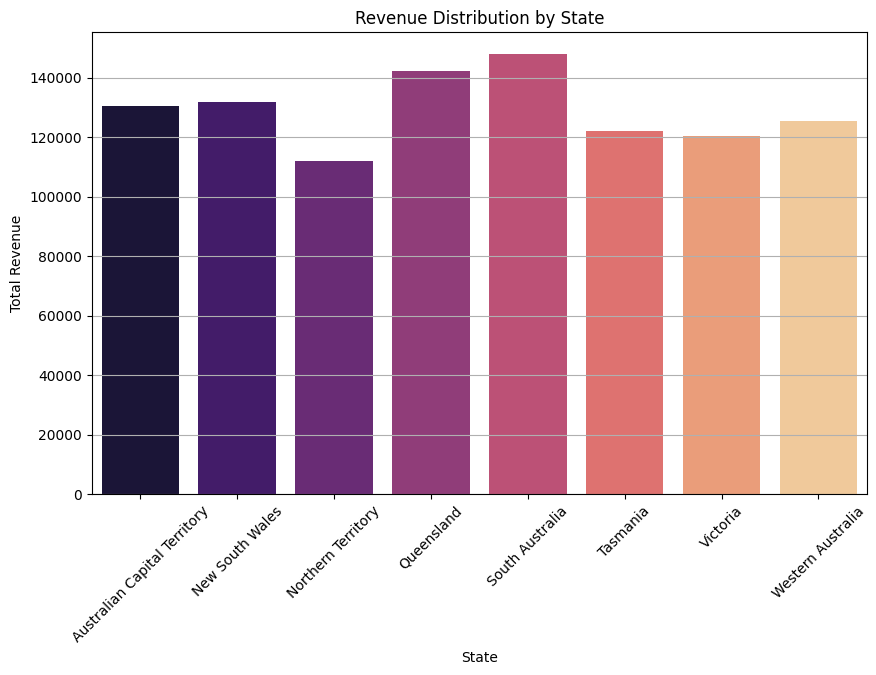

<ipython-input-10-1f21f8737f2f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


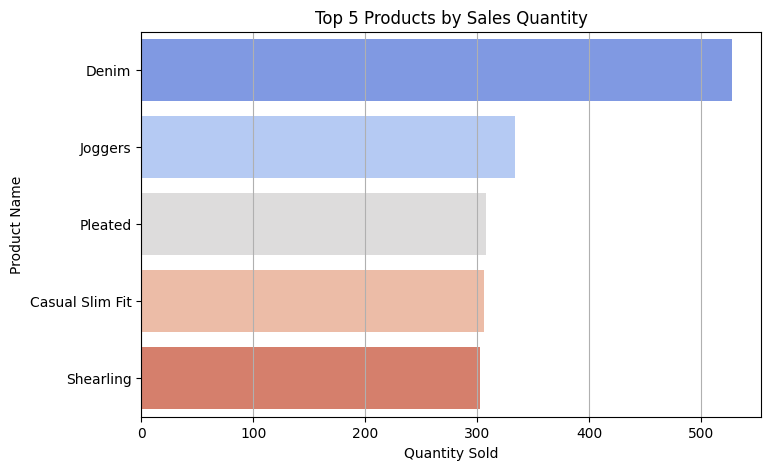

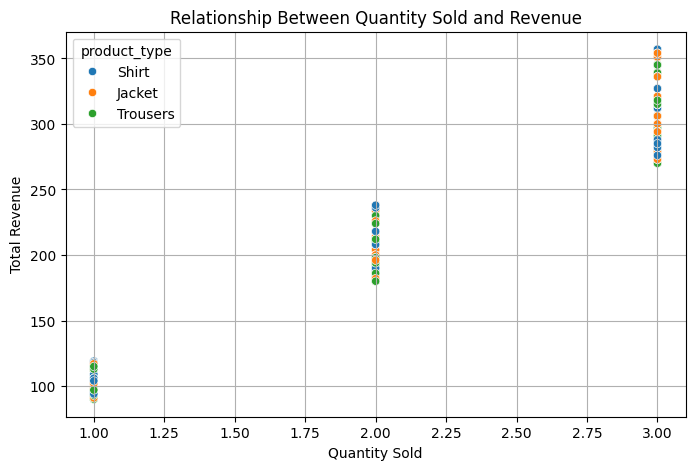

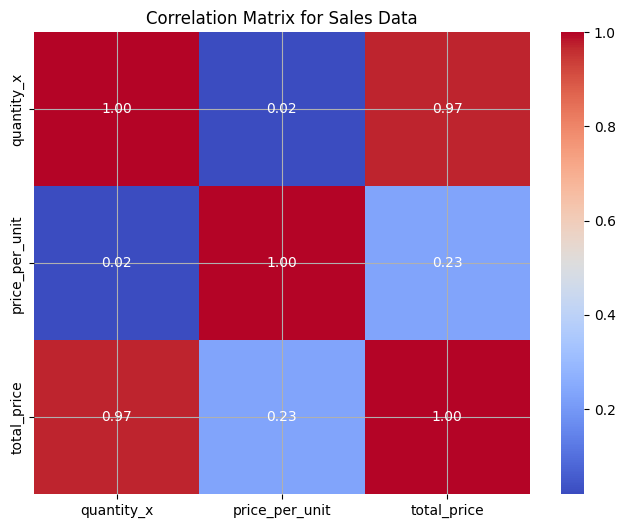

In [10]:

customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in orders_df['customer_id'].values else 'Non Active'
)

plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='status', palette='viridis')
plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(customers_df['age'], bins=15, kde=True, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(sales_df['total_price'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

sales_by_state = pd.merge(sales_df, orders_df, on='order_id')
sales_by_state = pd.merge(sales_by_state, customers_df, on='customer_id')
state_revenue = sales_by_state.groupby('state')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=state_revenue, x='state', y='total_price', palette='magma')
plt.title('Revenue Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

sales_product_df = pd.merge(sales_df, product_df, on='product_id')
top_products = sales_product_df.groupby('product_name')['quantity_x'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 5 Products by Sales Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sales_product_df, x='quantity_x', y='total_price', hue='product_type', palette='tab10')
plt.title('Relationship Between Quantity Sold and Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(8, 6))
numeric_cols = sales_product_df[['quantity_x', 'price_per_unit', 'total_price']].corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sales Data')
plt.show()


The 'order_date' column is not found in sales_df. Checking orders_df...


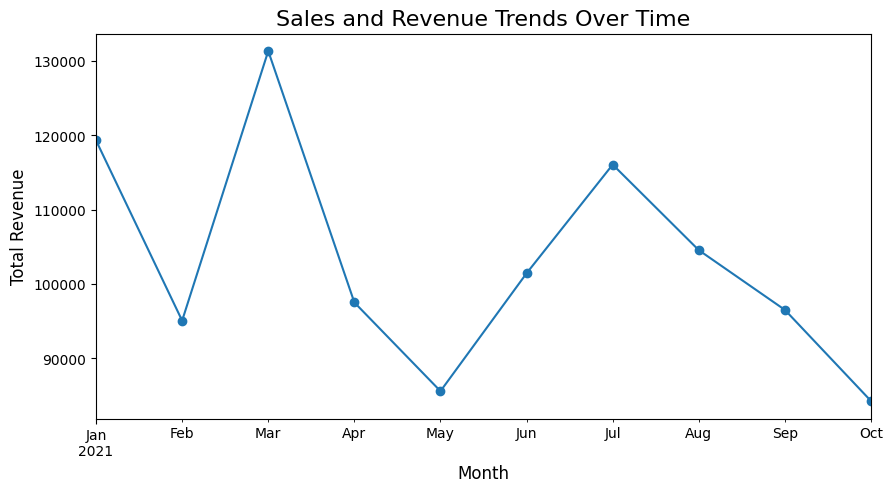

In [12]:
if 'order_date' not in sales_df.columns:
    print("The 'order_date' column is not found in sales_df. Checking orders_df...")
    sales_df = pd.merge(sales_df, orders_df[['order_id', 'order_date']], on='order_id', how='left')
    sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

sales_df['month'] = sales_df['order_date'].dt.to_period('M')  # Extract month
time_series_data = sales_df.groupby('month').total_price.sum()

plt.figure(figsize=(10, 5))
time_series_data.plot(kind='line', marker='o')
plt.title('Sales and Revenue Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid()
plt.show()


In [ ]:

sales_df['order_date'] = pd.to_datetime(orders_df['order_date'], errors='coerce')

sales_df = sales_df.dropna(subset=['order_date'])

time_series_data = sales_df.groupby('order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
time_series_data.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

decomposition = seasonal_decompose(time_series_data, model='additive', period=30)
decomposition.plot()
plt.show()

model = ARIMA(time_series_data, order=(1, 1, 1))
result = model.fit()

forecast = result.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Historical Sales")
plt.plot(pd.date_range(start=time_series_data.index[-1], periods=30, freq='D'),
         forecast, label="Forecast", color="red")
plt.title("Sales Forecast for Next 30 Days")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

y_pred = rf_model.predict(X_test)
print("Classification Report for Repeat Buyer Prediction:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.bar(X.columns, rf_model.feature_importances_, color='skyblue')
plt.title('Feature Importance for Repeat Buyer Prediction')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [39]:
print(sales_df.columns)


Index(['sales_id', 'order_id', 'product_id', 'price_per_unit', 'total_price',
       'customer_id', 'payment', 'delivery_date', 'customer_name', 'gender',
       'age', 'home_address', 'zip_code', 'city', 'state', 'country',
       'product_type', 'product_name', 'size', 'colour', 'price', 'quantity_y',
       'description', 'order_year', 'order_month', 'order_day',
       'order_dayofweek', 'order_date', 'repeat_customer'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='frequency', y='monetary', hue='cluster', palette='viridis')
plt.title('Customer Segments Based on Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

cluster_summary = rfm_df.groupby('cluster').agg({
    'frequency': ['mean', 'std'],
    'monetary': ['mean', 'std']
})
print("Cluster Summary:")
print(cluster_summary)

In [ ]:
print(rfm_df[['frequency', 'monetary', 'repeat_buyer']].corr())


              frequency  monetary  repeat_buyer
frequency      1.000000   0.51920      0.407892
monetary       0.519200   1.00000      0.228890
repeat_buyer   0.407892   0.22889      1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [1.         1.         0.97297297 1.         1.        ]
Mean accuracy: 0.9945945945945945


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
